<a class="anchor" id="0"></a>
# **Arbres de classificació amb Python**




<a class="anchor" id="0.1"></a>
# **Índex**



1.	[Importació de les llibreries i el dataset](#1)
2.	[Exploració de les dades](#2)
3.	[Separació de la matriu de caracerístiques X i el vector target Y](#3)
4.	[Separació de les dades en un conjunt d'entrenament i un de test](#4)
5.	[Feature engineering](#5)
6.	[Decision Tree classifier with criterion entropy](#6)
7.	[Matriu de confusió](#7)
8.	[Altres mesures de qualitat](#8)
9.	[Resultats i conclusions](#9)




# **1. Importació de les llibreries i el dataset** <a class="anchor" id="1"></a>

[Índex](#0.1)

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dades-cotxes/car_evaluation.csv


In [2]:
dades = '/kaggle/input/dades-cotxes/car_evaluation.csv'

df = pd.read_csv(dades)

# **2. Exploració de les dades** <a class="anchor" id="2"></a>

[Índex](#0.1)


In [3]:
print(df.shape)
df.head()

(1728, 7)


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,5more,2,small,low,unacc
freq,432,432,432,576,576,576,1210


### Distribució de les freqüències dels valors de les variables



In [5]:
for col in df.columns: 
    print(df[col].value_counts())


vhigh    432
low      432
high     432
med      432
Name: buying, dtype: int64
vhigh    432
low      432
high     432
med      432
Name: maint, dtype: int64
5more    432
2        432
4        432
3        432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
high    576
med     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [6]:
# Mirem si ha ha valors nuls

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# **3. Separació de la matriu de caracerístiques X i el vector target y** <a class="anchor" id="3"></a>

[Índex](#0.1)

# **4. Separació de les dades en un conjunt d'entrenament i un de test** <a class="anchor" id="4"></a>

[Índex](#0.1)

In [7]:
X = df.drop(['class'], axis=1)

y = df['class']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((1157, 6), (571, 6))

# **5. Feature Engineering** <a class="anchor" id="5"></a>

[Índex](#0.1)


**Feature Engineering** o enginyeria de característiques o atributs, és el procés de transformació de dades en brut en característiques útils que ens ajuden a entendre millor el nostre model i augmentar el seu poder predictiu. En aquest exemple, i ja que els arbres de classificació a l'sklearn tenen la limitació de que nomès poden traballar amb dades numèriques, hem de codificar els atributs categòrics

In [9]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [10]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [11]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


# **6. Arbre de classificació amb criteri entropia** <a class="anchor" id="6"></a>

[Índex](#0.1)

In [12]:
from sklearn.tree import DecisionTreeClassifier
car_class_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
car_class_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

### Predicció de les casses al conjunt de prova

In [13]:
y_pred = car_class_tree.predict(X_test)
print(list(y_test)[:15])
print(y_pred[:15])

['unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'acc', 'unacc', 'unacc', 'unacc']
['unacc' 'good' 'unacc' 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'acc' 'unacc'
 'acc' 'good' 'acc' 'unacc' 'unacc']


### Comparem accuracy de l'arbre pels conjunts d'entrenament i test

In [14]:
print('Training set score: {:.4f}'.format(car_class_tree.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(car_class_tree.score(X_test, y_test)))

Training set score: 0.8341
Test set score: 0.8424


### Visualització de l'arbre de classificació

[Text(334.8, 391.392, 'X[5] <= 1.5\nentropy = 1.2\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(251.10000000000002, 304.416, 'entropy = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(418.5, 304.416, 'X[3] <= 2.5\nentropy = 1.474\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(334.8, 217.44, 'X[0] <= 2.5\nentropy = 1.638\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(167.4, 130.464, 'X[1] <= 1.5\nentropy = 0.995\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(83.7, 43.488, 'entropy = 0.0\nsamples = 68\nvalue = [0, 0, 68, 0]'),
 Text(251.10000000000002, 43.488, 'entropy = 0.964\nsamples = 203\nvalue = [124, 0, 79, 0]'),
 Text(502.20000000000005, 130.464, 'X[1] <= 2.5\nentropy = 1.759\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(418.5, 43.488, 'entropy = 1.106\nsamples = 129\nvalue = [92, 0, 27, 10]'),
 Text(585.9, 43.488, 'entropy = 1.781\nsamples = 125\nvalue = [39, 49, 7, 30]'),
 Text(502.20000000000005, 217.44, 'entropy = 0.0\nsamples = 246\nvalue = [0, 0,

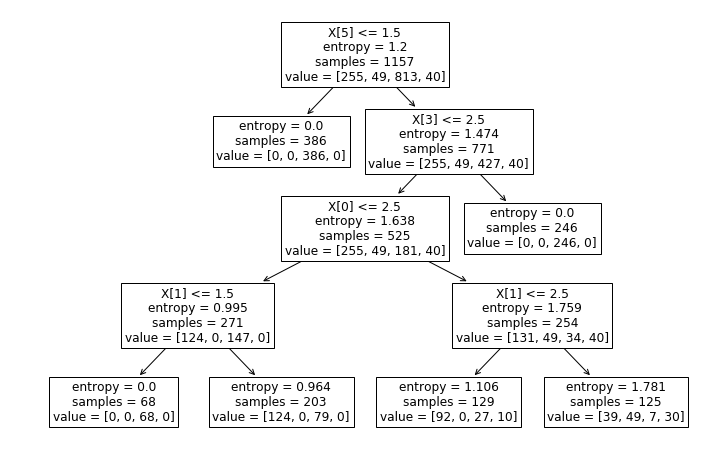

In [15]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(car_class_tree.fit(X_train, y_train)) 

# **7. Matriu de confusió** <a class="anchor" id="7"></a>

[Índex](#0.1)

In [16]:
from sklearn.metrics import confusion_matrix

y_pred = car_class_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[105  24   0   0]
 [  0  20   0   0]
 [ 40   1 356   0]
 [  3  22   0   0]]


# **8. Classification Report. Atres mesures de qualitat** <a class="anchor" id="8"></a>

[Índex](#0.1)

car_class_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
car_class_tree.fit(X_train, y_train)Un **classification report** és una altra manera d'avaluar el rendiment del model de classificació. Mostra les puntuacions de **precission**, **recall**, **f1** i **support** per al model.

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.71      0.81      0.76       129
        good       0.30      1.00      0.46        20
       unacc       1.00      0.90      0.95       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.84       571
   macro avg       0.50      0.68      0.54       571
weighted avg       0.87      0.84      0.84       571



# **9. Detecció de l'overfitting** <a class="anchor" id="9"></a>

[Índex](#0.1)

Calculem l'**accuracy** del model depenent de la profunditat de l'arbre per tal de detectar si es produeix overfitting

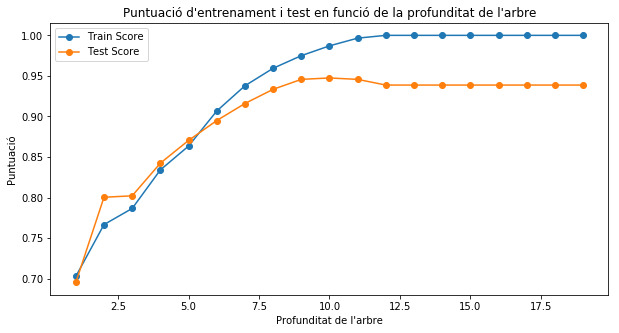

In [18]:
train_scores = []
test_scores = []
depths = list(range(1,20))
for depth in depths:
    car_class_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    car_class_tree.fit(X_train, y_train)
    train_score = car_class_tree.score(X_train, y_train)
    test_score = car_class_tree.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure(figsize=(10,5))
plt.plot(depths, train_scores, marker='o', label='Train Score')
plt.plot(depths, test_scores, marker='o', label='Test Score')
plt.xlabel("Profunditat de l'arbre")
plt.ylabel('Puntuació')
plt.title("Puntuació d'entrenament i test en funció de la profunditat de l'arbre")
plt.legend()
plt.show()


Veiem que a partir de profunditat 9-10 l'**accuracy** amb el conjunt de test comença a disminuir, mentre que amb el conjunt d'entrenament continua augmentant. A partir d'aquest punt, doncs, es produeix **overffiting**